In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch
from torch.nn import *

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 224, 224)
    
def crop_l(image):
    return crop(image, 4, 4, 224, 224)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/KITTI/08'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.ViT_B_16_Weights
model = models.vit_b_16(weights=weights)
model

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
      if i > min_:
        inputs, labels = data
        outputs = model(inputs)
        output_.append(outputs)
        if i > max_:
          return output_


In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      outputs = model(inputs)
      output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,164):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*25
    max_ = n_it*25
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_kitti_08_visiontransformer/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 19)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82,database83,database84,database85,database86,database87,database88,database89,database90,
            database91,database92,database93,database94,database95,database96,database97,database98,database99,database100,
            database101,database102,database103,database104,database105,database106,database107,database108,database109,database110,
            database111,database112,database113,database114,database115,database116,database117,database118,database119,database120,
            database121,database122,database123,database124,database125,database126,database127,database128,database129,database130,
            database131,database132,database133,database134,database135,database136,database137,database138,database139,database140,
            database141,database142,database143,database144,database145,database146,database147,database148,database149,database150,
            database151,database152,database153,database154,database155,database156,database157]
d = []

In [ ]:
c = 0
for d in database122:
    distance = torch.cdist(d, database1[0], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 44.198970794677734
image: 1, distance: 52.59122848510742
image: 2, distance: 48.059120178222656
image: 3, distance: 53.077003479003906
image: 4, distance: 47.22883987426758
image: 5, distance: 44.748992919921875
image: 6, distance: 43.89263153076172
image: 7, distance: 41.84841537475586
image: 8, distance: 46.54290008544922
image: 9, distance: 49.320152282714844
image: 10, distance: 45.970703125
image: 11, distance: 52.25110626220703
image: 12, distance: 52.252235412597656
image: 13, distance: 53.91249084472656
image: 14, distance: 50.74872589111328
image: 15, distance: 53.064231872558594
image: 16, distance: 51.33668518066406
image: 17, distance: 48.59075164794922
image: 18, distance: 47.978389739990234
image: 19, distance: 49.755218505859375
image: 20, distance: 49.69155502319336
image: 21, distance: 46.92896270751953
image: 22, distance: 47.277305603027344
image: 23, distance: 46.29167938232422
image: 24, distance: 49.6359748840332
image: 25, distance: 46.5502471

In [ ]:
co = 0
for bg in database:
  
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      with open('/content/drive/MyDrive/Datasets/KITTI/loop_kitti_08_visiontransformer_v3.txt', 'a') as txt_file:
        if loop_ > 0:
          txt_file.write('Found loop')
          image_number = round(((co*25)+i)/2,0)
          txt_file.write('\n image: '+str(image_number))
          txt_file.write('\n')
        else:
          d.append(data)
  co += 1


loop
tensor([[-1.1191, -0.0679, -1.1770,  ..., -0.7313, -0.6124, -0.0257]],
       requires_grad=True)
loop
tensor([[-1.1249, -0.0846, -1.3603,  ..., -0.4368, -0.6000, -0.5546]],
       requires_grad=True)
loop
tensor([[-1.0414,  0.0351, -1.0637,  ..., -0.3071, -0.4118, -0.4934]],
       requires_grad=True)
loop
tensor([[-1.0810,  0.1424, -1.3392,  ..., -0.2199, -0.2802, -0.1334]],
       requires_grad=True)
loop
tensor([[ 0.0784, -0.3573, -0.6158,  ..., -0.4421, -0.7620, -0.3018]],
       requires_grad=True)
loop
tensor([[ 0.1659, -0.5161, -0.9300,  ..., -0.1902, -0.4623, -0.3034]],
       requires_grad=True)
loop
tensor([[-0.1895, -0.3150, -0.8500,  ..., -0.5328, -0.0100, -0.3509]],
       requires_grad=True)
loop
tensor([[-0.0304, -0.1941, -0.6003,  ..., -0.7436, -0.4497, -0.5198]],
       requires_grad=True)
loop
tensor([[-0.0304, -0.1941, -0.6003,  ..., -0.7436, -0.4497, -0.5198]],
       requires_grad=True)
loop
tensor([[-0.2409, -0.1166, -0.3570,  ..., -0.4423, -0.7594, -0.4956]

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/kitti_08_visiontransformer.csv')


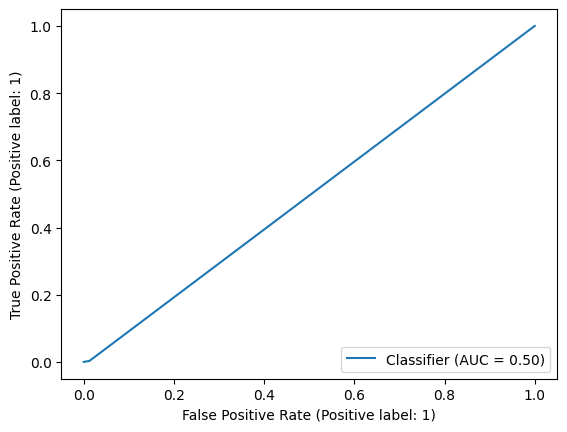

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.4952698516277445
Accuracy:  0.9090909090909091
f1:  0.005376344086021505


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[3699,   47],
       [ 323,    1]])